<p style="font-size:300%; text-align:center"> king county housing price modeling</p>
<p style="font-size:150%; text-align:center"> MOD2 Final Project</p>


Please fill out:
* Student name: Chamila C. Dharmawardhana
* Student pace: full time
* Scheduled project review date/time: 5/6/2020 2.00 PM CDT
* Instructor name: Amber Yandow
* Blog post URL: https://github-ccd.github.io/king_county_wa_housing_market


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
# %matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/kc_house_data.csv') 
display(df.sample(3).T, len(df)) # took the transpose in order to see all the features clearly

,17328,13273,4909
id,4232900250,3013300085,7950302890
date,7/10/2014,5/15/2014,12/30/2014
price,525000,744000,455000
bedrooms,2,4,4
bathrooms,1.5,3,2
sqft_living,1340,1980,2380
sqft_lot,3600,5352,4500
floors,1.5,2.5,1.5
waterfront,NaN,0,0
view,0,0,0


21597

# EDA
Now that we know the what the data looks like let's explore more closely to understand the data better. What are the main questions here 
1. What are the size and data types and are they consistant with the feature discriptions ? 
2. are there any Null or missing values? if so what to do about it ? 
3. get sense of the data interms of the objective. What fields, after a close inspection of the data would relate to the outcome wich is the house price 

Research into KC dataset I was able to find the specific definitions of the features.
* <b>id</b> - ID for each house sold
* <b>date</b> - date house sold
* <b>price</b> - price of home. is prediction target
* <b>bedrooms</b> - of Bedrooms/House 
* <b>bathrooms</b> - of bathrooms/bedrooms, where 0.5 account for room with a toilet but no shower
* <b>sqft_living</b> - footage of the living area
* <b>sqft_lot</b> - footage of the land space
* <b>floors</b> - floors (levels) in house
* <b>waterfront</b> - dummy variable House which has a view to a waterfront
* <b>view</b> - index of 0-4 of how good the view of the property 
* <b>condition</b> - index of 1-5 how good the condition is ( Overall )
* <b>grade</b> - index of 1-13 King County grading system. 
                 1-3 falls short of construction and design, 
                 4-10 or 7 is average,
                 11-13 is high quality. 
* <b>sqft_above</b> - total footage above ground 
* <b>sqft_basement</b> - square footage of the basement
* <b>yr_built</b> - Built Year
* <b>yr_renovated</b> - Year last renovated
* <b>zipcode</b> - zipcode
* <b>lat</b> - Latitude coordinate
* <b>long</b> - Longitude coordinate
* <b>sqft_living15</b> - The square footage of interior housing living space for the nearest 15 neighbors
* <b>sqft_lot15</b> - The square footage of the land lots of the nearest 15 neighbors

## Let's look at the target variable first

As we're not going to touch 'Price' in the cleaning process of the data let’s look at the price distribution first. It may give us clues of the boundaries of the dataset. 

In [3]:
# make temp data frame
df_price = df[["price"]]

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

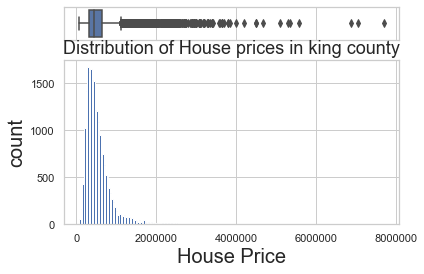

In [4]:
display(df_price.price.describe())
plt.style.use('ggplot')
sns.set(style="whitegrid")
# Let's create histogram-boxwhisker for price distrbution
# cut the window in two parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": [1, 5]})
# now let's add appropriate graphs respectively
sns.boxplot(df['price'], ax=ax_box)
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize":[20, 10]})
sns.distplot(
    df_price['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
)#.set(xlabel='House Price', ylabel='count')
ax_hist.set_xlabel('House Price', fontsize=20)
ax_hist.set_ylabel('count', fontsize=20)
    
# now remove axis names from box plot and add a title
ax_box.set(xlabel='')
plt.title('Distribution of House prices in king county')
plt.savefig('img/price_dist.png') # Save figure ./img
plt.show()

In [5]:
display(df[df.price > 2000000])
print("percent of houses over 2 million = {:.2f}%".format((198/21597)*100))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,0.0,3.0,...,12,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
269,7960900060,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,0.0,2.0,...,11,4750,300.0,1982,NaN,98004,47.6312,-122.223,3890,20060
282,7424700045,5/13/2015,2050000.0,5,3.00,3830,8480,2.0,0.0,1.0,...,9,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21294,2154970020,7/3/2014,2350000.0,4,4.25,5010,19412,2.0,0.0,1.0,...,11,4000,1010.0,2014,0.0,98040,47.5455,-122.211,3820,17064
21352,9533100285,6/30/2014,2070000.0,4,3.75,4350,7965,2.0,0.0,0.0,...,10,4350,0.0,2013,0.0,98004,47.6289,-122.205,2190,8557
21490,2524069097,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,0.0,0.0,...,12,6420,850.0,2010,NaN,98027,47.5371,-121.982,1800,44890
21514,8964800330,4/7/2015,3000000.0,4,3.75,5090,14823,1.0,0.0,0.0,...,11,4180,910.0,2013,NaN,98004,47.6200,-122.207,3030,12752


percent of houses over 2 million = 0.92%


In [6]:
''' 
There's only 0.92 % of data have houses over $ 2 million. These should not conform to normal metric of price predictions.
so let's remove them
'''
df = df[df.price <= 2000000]

##  data types correct? Is data clean ?


In [7]:
# let's check the data types. 
# do they? make sense? are they consistant ?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 21 columns):
id               21399 non-null int64
date             21399 non-null object
price            21399 non-null float64
bedrooms         21399 non-null int64
bathrooms        21399 non-null float64
sqft_living      21399 non-null int64
sqft_lot         21399 non-null int64
floors           21399 non-null float64
waterfront       19038 non-null float64
view             21337 non-null float64
condition        21399 non-null int64
grade            21399 non-null int64
sqft_above       21399 non-null int64
sqft_basement    21399 non-null object
yr_built         21399 non-null int64
yr_renovated     17593 non-null float64
zipcode          21399 non-null int64
lat              21399 non-null float64
long             21399 non-null float64
sqft_living15    21399 non-null int64
sqft_lot15       21399 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2361
view               62
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3806
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### let's take care of Null of waterfront, view and yr_renovated first
We only have 21597 entries in this dataset. The waterfront, view and yr_renovated has 2339, 61 and 3754 Null values respectively. 
Let's take a closer look at waterfront, view and yr_renovated to evaluate the best way to deal with the NUll values! 

count    21337.000000
mean         0.217556
std          0.732184
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

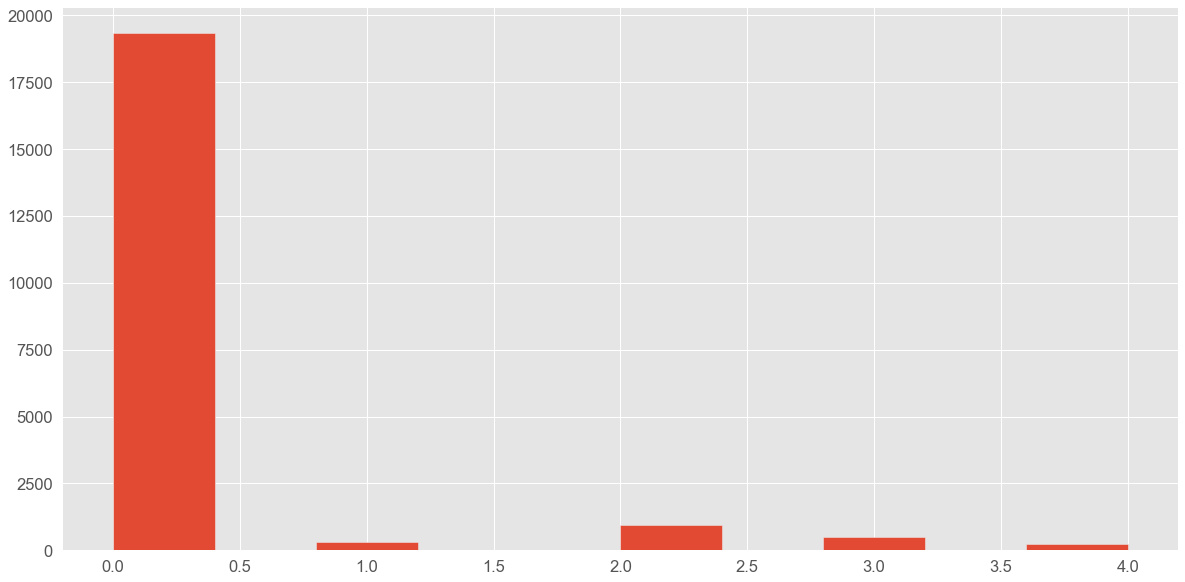

In [9]:
display(df.view.describe())
plt.style.use('ggplot')
df.view.hist()

In [10]:
# looking at the distribution it's difficult to say mean is the best replacement value
df.view = df.view.fillna(value=df.view.median()) # i'm going with median as the replacement value
df['view'] = df['view'].astype('float') # to make sure float 

count    19038.000000
mean         0.005410
std          0.073357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

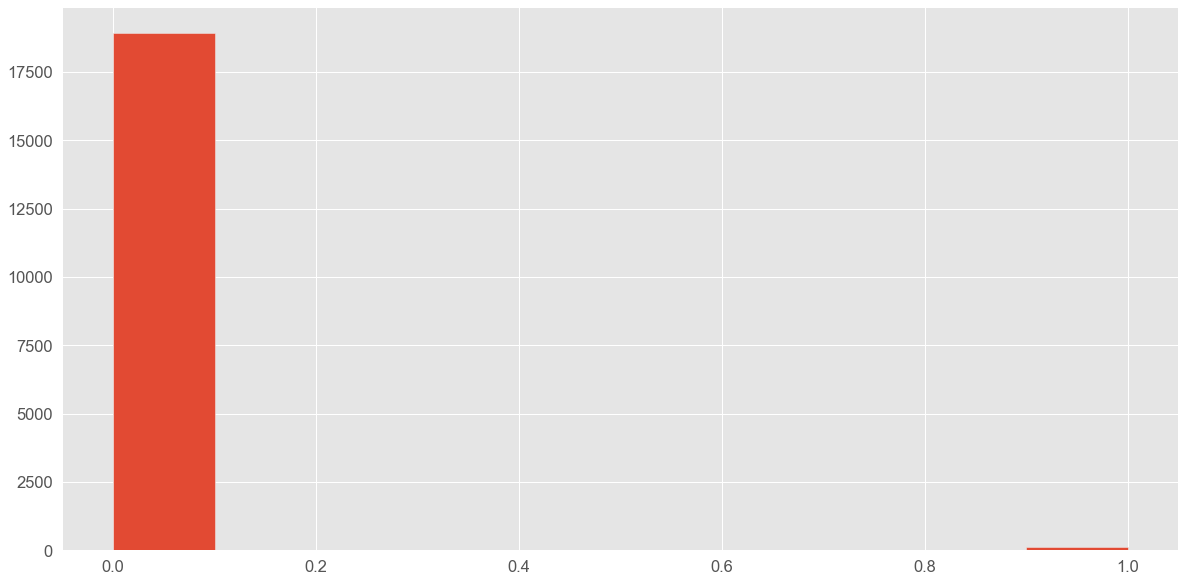

In [11]:
# now the waterfront 
display(df.waterfront.describe())
df.waterfront.hist()

In [12]:
# let's see how many properties are actually waterfront 
df.waterfront.value_counts()

0.0    18935
1.0      103
Name: waterfront, dtype: int64

In [13]:
# since so many properties are away from waterfront it makes sense to replace the null values with zero or similarly with 
# waterfront.median() == 0
df.waterfront = df.waterfront.fillna(value=df.waterfront.median())
df['waterfront'] = df['waterfront'].astype('float') # to make sure float 

count    17593.000000
mean        81.342409
std        394.655905
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

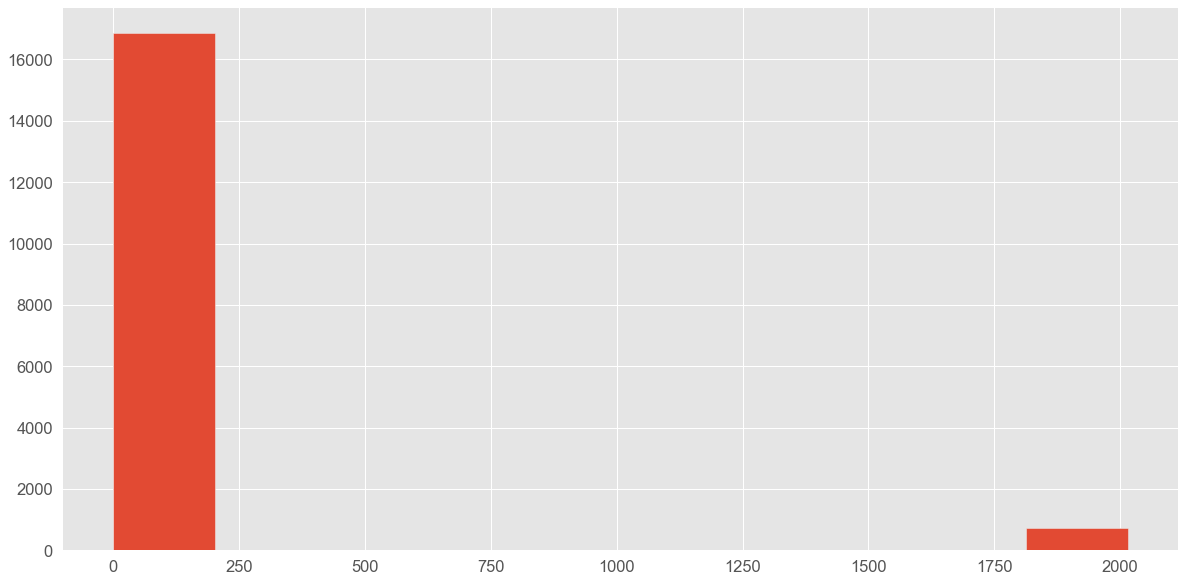

In [14]:
# let's inspect yr_renovated
display(df.yr_renovated.describe())
df.yr_renovated.hist()

In [15]:
print(df.yr_renovated.value_counts())
display(df.yr_renovated.median())

0.0       16876
2014.0       73
2003.0       30
2013.0       30
2000.0       29
          ...  
1934.0        1
1944.0        1
1959.0        1
1976.0        1
1953.0        1
Name: yr_renovated, Length: 70, dtype: int64


0.0

This means most of yr_renovated feature has dummy values or the last renovated year is not known for 78% of the data. Thus, it maybe okay remove the feature completely.  

In [16]:
df = df.drop(["yr_renovated"], axis=1) # dropping yr_renovated

In [17]:
# let's see how many bathrooms/bedroom 
df.bathrooms.value_counts()

2.50    5361
1.00    3851
1.75    3046
2.25    2041
2.00    1929
1.50    1445
2.75    1181
3.00     737
3.50     712
3.25     558
3.75     142
4.00     117
4.50      88
0.75      71
4.25      60
5.00      16
4.75      10
1.25       9
5.25       9
5.50       4
0.50       4
5.75       3
6.00       2
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,tot_bathrooms
1658,9126101740,12/4/2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,...,8,1880,920.0,1997,98122,47.6086,-122.303,1800,2580,40.00
3717,5451100490,1/15/2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,...,8,5370,0.0,1967,98040,47.5380,-122.223,2310,10910,33.25
4020,9175600025,10/7/2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,...,11,5080,2400.0,1953,98166,47.4643,-122.368,2810,33190,47.25
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,98103,47.6927,-122.338,1460,6291,40.50
4594,9297300740,11/18/2014,643500.0,6,5.25,3600,3960,2.0,0.0,0.0,...,7,2400,1200.0,1971,98126,47.5656,-122.372,1450,4600,31.50
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,98105,47.6604,-122.289,2510,5000,40.50
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,98144,47.5923,-122.301,1448,3866,67.50
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,98106,47.5560,-122.363,1420,4960,33.00
9443,2769600590,10/16/2014,900000.0,8,4.00,4020,7500,1.0,0.0,0.0,...,8,2010,2010.0,1968,98107,47.6732,-122.363,1560,3737,32.00
12752,7663700968,5/28/2014,565000.0,7,4.50,4140,9066,1.0,0.0,0.0,...,7,2070,2070.0,1978,98125,47.7302,-122.291,1440,1865,31.50


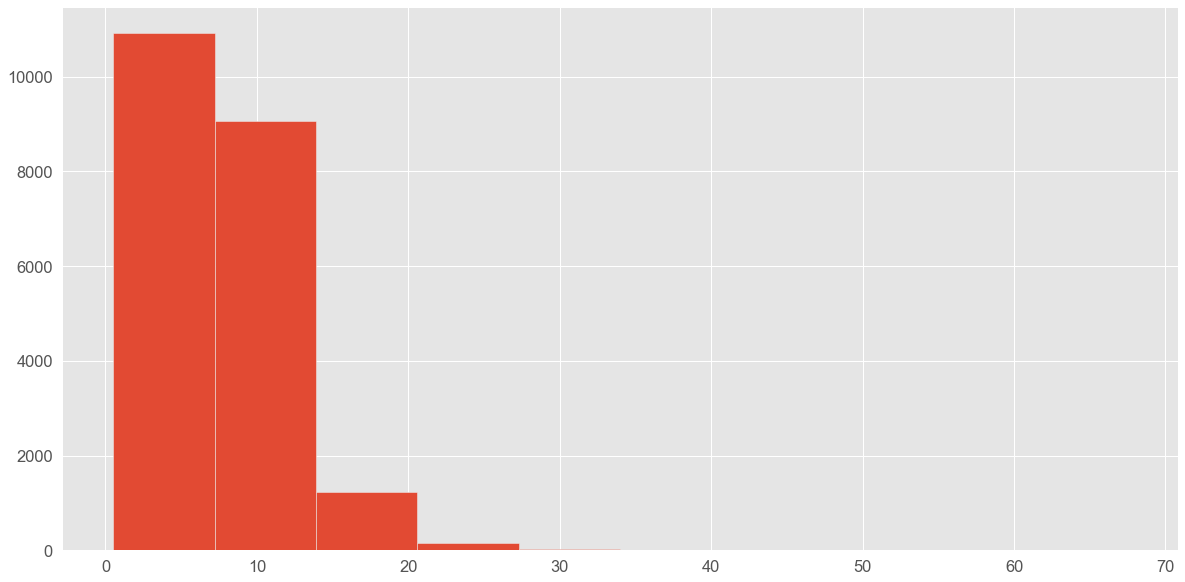

In [18]:
df['tot_bathrooms'] = df.apply(lambda row: row.bathrooms * row.bedrooms, axis=1)
display(df[df.tot_bathrooms > 30])
df.tot_bathrooms.hist()

It's difficult to imagine more than 30 bathrooms in one house. But there are 10 such housses. 

### let's check again data types. 

In [19]:
#id               21597 non-null int64
df['id'] = df['id'].astype('int64') 
#date             21597 non-null object
df['date']= pd.to_datetime(df['date']) 
#price            21597 non-null float64
df['price'] = df['price'].astype('int64') 
#bedrooms         21597 non-null int64
df['bedrooms'] = df['bedrooms'].astype('int64') 
#bathrooms        21597 non-null float64
df['bathrooms'] = df['bathrooms'].astype('float64') 
#sqft_living      21597 non-null int64
df['sqft_living'] = df['sqft_living'].astype('float64') 
#sqft_lot         21597 non-null int64
df['sqft_lot'] = df['sqft_lot'].astype('float64') 
#floors           21597 non-null float64
df['floors'] = df['floors'].astype('float64') 
#waterfront       19221 non-null float64
df['waterfront'] = df['waterfront'].astype('float64') 
#view             21534 non-null float64
df['view'] = df['view'].astype('float64') 
#condition        21597 non-null int64
df['condition'] = df['condition'].astype('int64') 
#grade            21597 non-null int64
df['grade'] = df['grade'].astype('int64') 
#sqft_above       21597 non-null int64
df['sqft_above'] = df['sqft_above'].astype('float64') 

#yr_built         21597 non-null int64
df['yr_built'] = df['yr_built'].astype('int64') 
#zipcode          21597 non-null int64
df['zipcode'] = df['zipcode'].astype('int64') 
#lat              21597 non-null float64
df['lat'] = df['lat'].astype('float64') 
#long             21597 non-null float64
df['long'] = df['long'].astype('float64') 
#sqft_living15    21597 non-null int64
df['sqft_living15'] = df['sqft_living15'].astype('float64') 
#sqft_lot15       21597 non-null int64 
df['sqft_lot15'] = df['sqft_lot15'].astype('float64') 

### Apparently there is a '?' tag in the data somewhere 
#sqft_basement    21597 non-null object<br>
df['sqft_basement'] = df['sqft_basement'].astype('float64') <br>
This doesn't work. Apparently there is a '?' tag in the data somewhere. <br> Let's see what we missed in cleaning. 

In [20]:
df_sqft_basement=df[df.sqft_basement == '?']  # how many sqft_basement rows have ? 
display(df_sqft_basement)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,tot_bathrooms
6,1321400060,2014-06-27,257500,3,2.25,1715.0,6819.0,2.0,0.0,0.0,...,7,1715.0,?,1995,98003,47.3097,-122.327,2238.0,6819.0,6.75
18,16000397,2014-12-05,189000,2,1.00,1200.0,9850.0,1.0,0.0,0.0,...,7,1200.0,?,1921,98002,47.3089,-122.210,1060.0,5095.0,2.00
42,7203220400,2014-07-07,861990,5,2.75,3595.0,5639.0,2.0,0.0,0.0,...,9,3595.0,?,2014,98053,47.6848,-122.016,3625.0,5639.0,13.75
79,1531000030,2015-03-23,720000,4,2.50,3450.0,39683.0,2.0,0.0,0.0,...,10,3450.0,?,2002,98010,47.3420,-122.025,3350.0,39750.0,10.00
112,2525310310,2014-09-16,272500,3,1.75,1540.0,12600.0,1.0,0.0,0.0,...,7,1160.0,?,1980,98038,47.3624,-122.031,1540.0,11656.0,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600,5,3.00,2360.0,5000.0,1.0,0.0,0.0,...,7,1390.0,?,2008,98103,47.6931,-122.330,2180.0,5009.0,15.00
21447,1760650900,2014-07-21,337500,4,2.50,2330.0,4907.0,2.0,0.0,0.0,...,7,2330.0,?,2013,98042,47.3590,-122.081,2300.0,3836.0,10.00
21473,6021503707,2015-01-20,352500,2,2.50,980.0,1010.0,3.0,0.0,0.0,...,8,980.0,?,2008,98117,47.6844,-122.387,980.0,1023.0,5.00
21519,2909310100,2014-10-15,332000,4,2.50,2380.0,5737.0,2.0,0.0,0.0,...,7,2380.0,?,2010,98023,47.2815,-122.356,2380.0,5396.0,10.00


0.0       12775
?           450
600.0       215
500.0       209
700.0       205
          ...  
295.0         1
935.0         1
374.0         1
1248.0        1
1920.0        1
Name: sqft_basement, Length: 292, dtype: int64

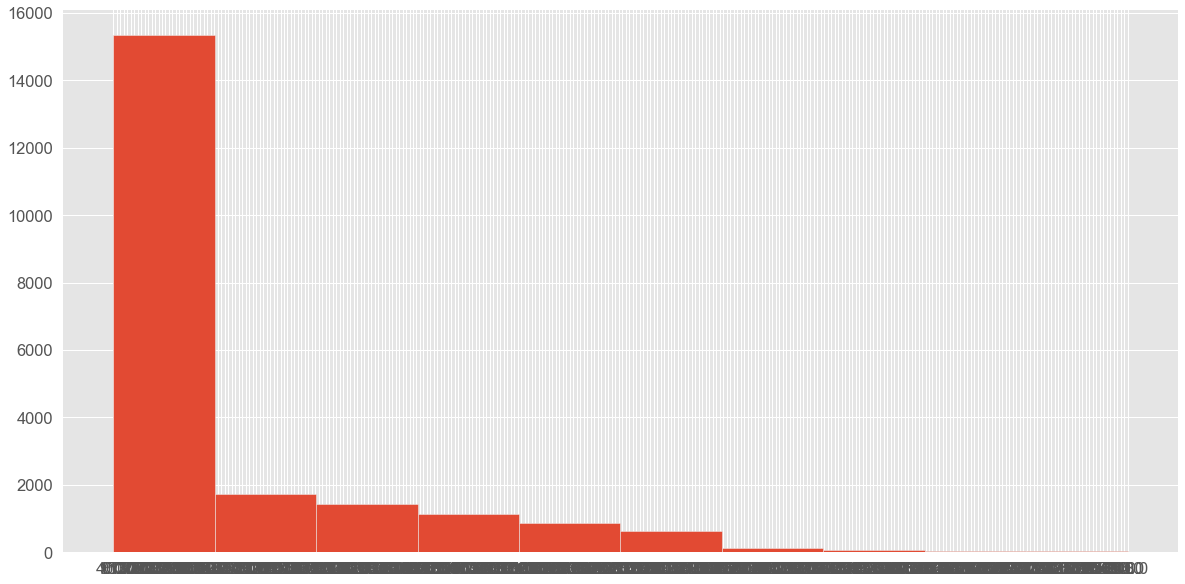

In [21]:
display(df.sqft_basement.value_counts())
# display(df.sqft_basement.mean()) # can't calculate because of the '?' label 
df.sqft_basement.hist(bins=10) # histogram looks wierd becuase of the lable '?' as well 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B20CFEB70>,
      dtype=object)

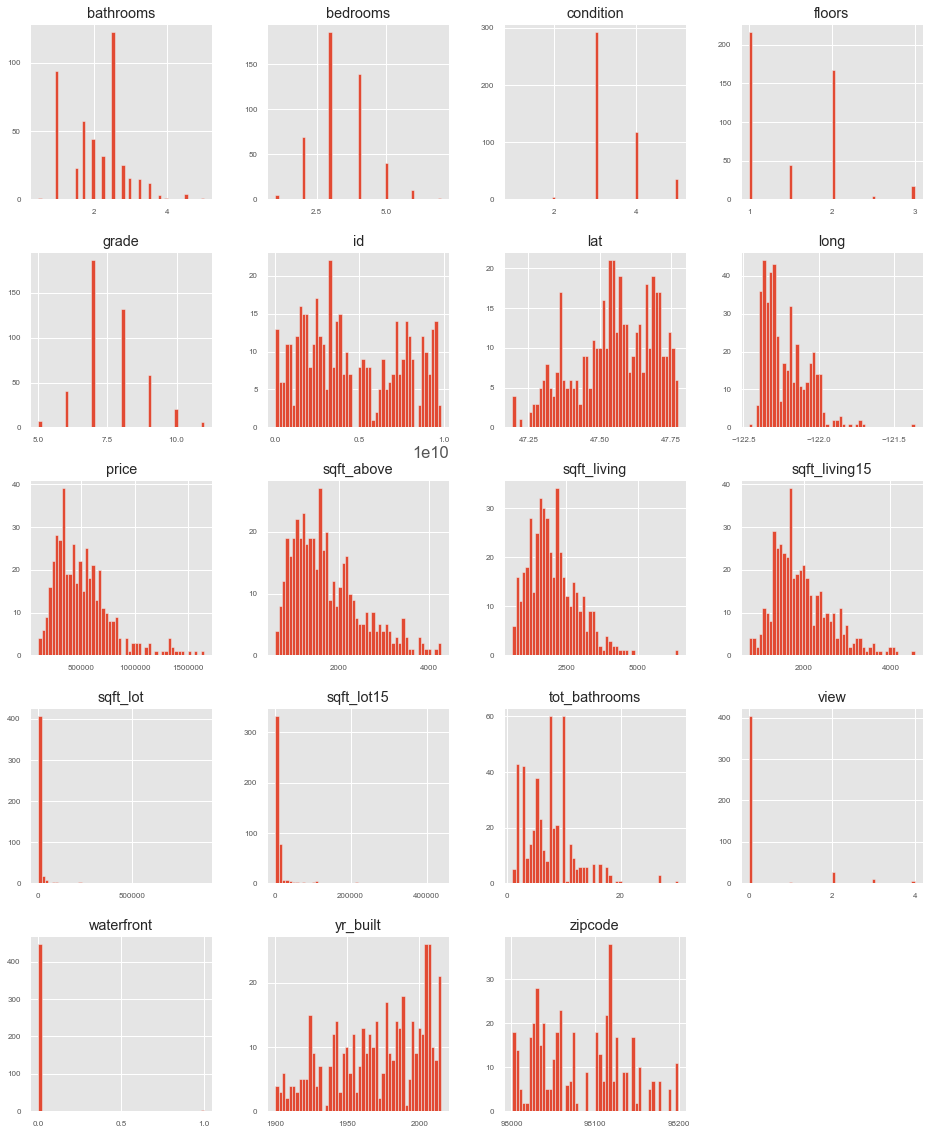

In [22]:
# What does the rest of the data look like for the basement with '?' tag. I'm assuming it means the the data for these
# rows was simply not available 
df_sqft_basement.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

Although it's 2% of the data rest of the features for those data seems reasonable and doedn't make sense to drop those records. So I'm going to replace those with zero. 

0.0       13225
600.0       215
500.0       209
700.0       205
800.0       200
          ...  
602.0         1
1281.0        1
915.0         1
2130.0        1
1890.0        1
Name: sqft_basement, Length: 291, dtype: int64

count    21399.000000
mean       279.038506
std        428.251572
min          0.000000
25%          0.000000
50%          0.000000
75%        530.000000
max       3260.000000
Name: sqft_basement, dtype: float64

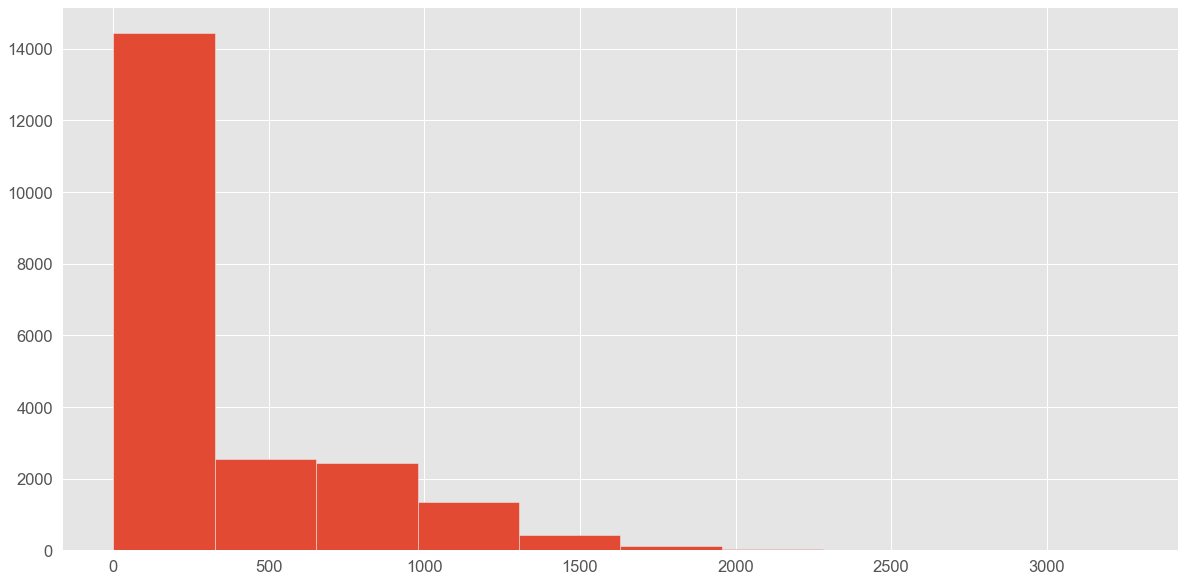

In [23]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda b: 0.0 if b == '?' else b)
# make sure data type is float
df['sqft_basement'] = df['sqft_basement'].astype('float64') 
display(df.sqft_basement.value_counts())
display(df.sqft_basement.describe()) # can't calculate because of the '?' label 
df.sqft_basement.hist()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 21 columns):
id               21399 non-null int64
date             21399 non-null datetime64[ns]
price            21399 non-null int64
bedrooms         21399 non-null int64
bathrooms        21399 non-null float64
sqft_living      21399 non-null float64
sqft_lot         21399 non-null float64
floors           21399 non-null float64
waterfront       21399 non-null float64
view             21399 non-null float64
condition        21399 non-null int64
grade            21399 non-null int64
sqft_above       21399 non-null float64
sqft_basement    21399 non-null float64
yr_built         21399 non-null int64
zipcode          21399 non-null int64
lat              21399 non-null float64
long             21399 non-null float64
sqft_living15    21399 non-null float64
sqft_lot15       21399 non-null float64
tot_bathrooms    21399 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(7)
memory us

## are there any more outliers ? 
let's make histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B23B00128>,
      dtype=object)

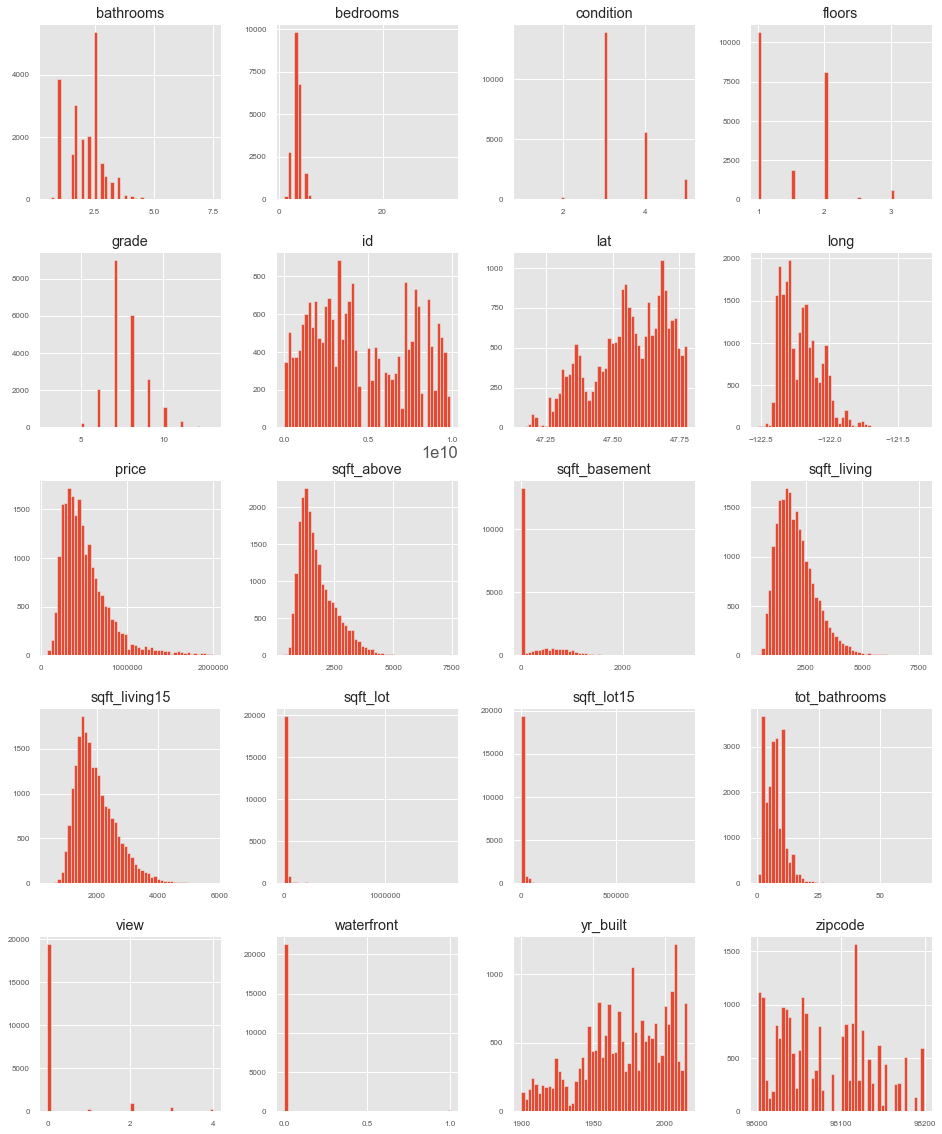

In [25]:
df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [26]:
# bedrooms look odd 
display(df.bedrooms.value_counts())

3     9793
4     6792
2     2759
5     1544
6      260
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [27]:
# clearly 33 bedrooms is an outlier 
df = df[df.bedrooms < 33]

## Let's explor the clean data
Save the clean data to a kc_house_data_clean.csv file

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'tot_bathrooms'],
      dtype='object')

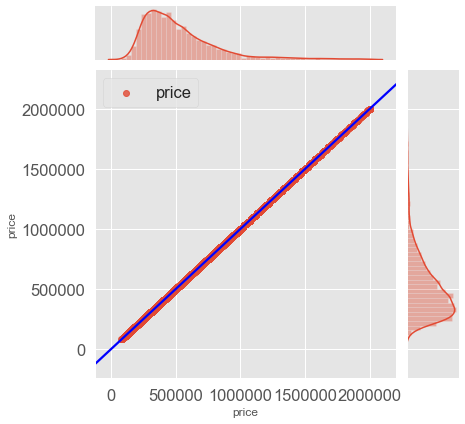

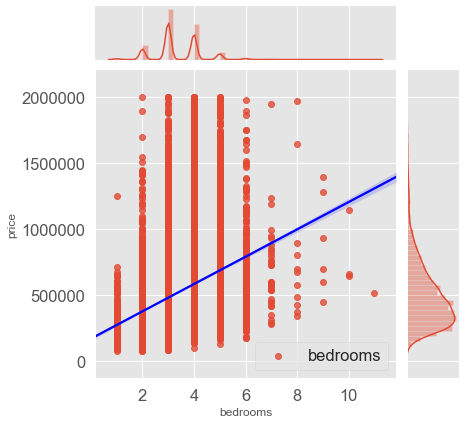

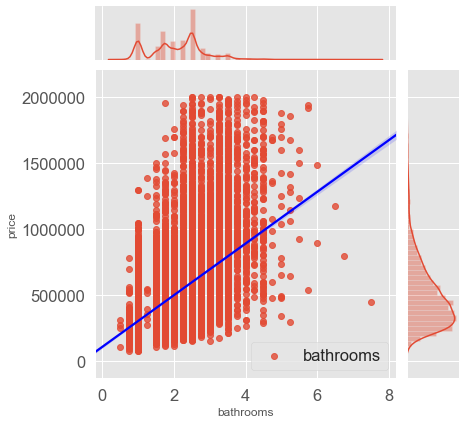

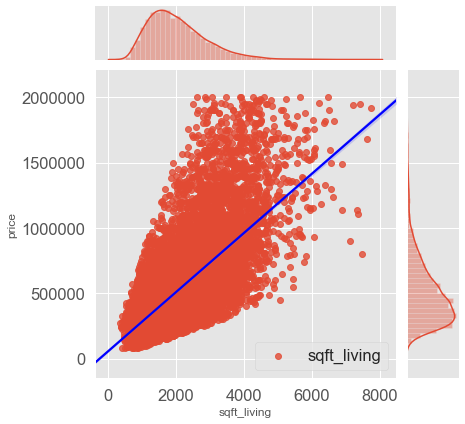

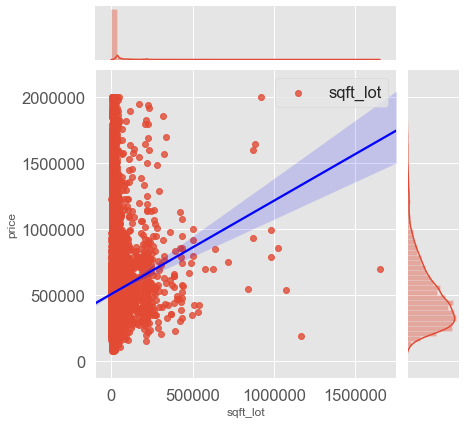

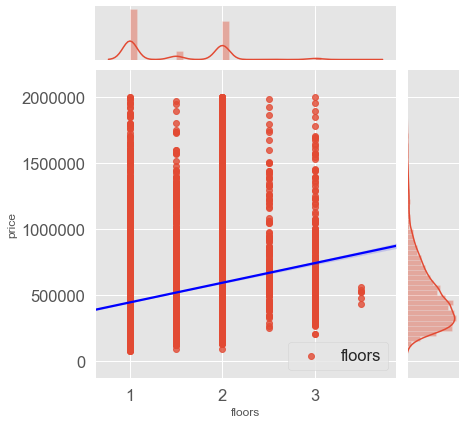

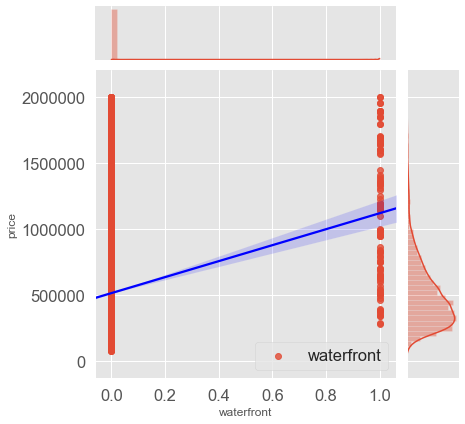

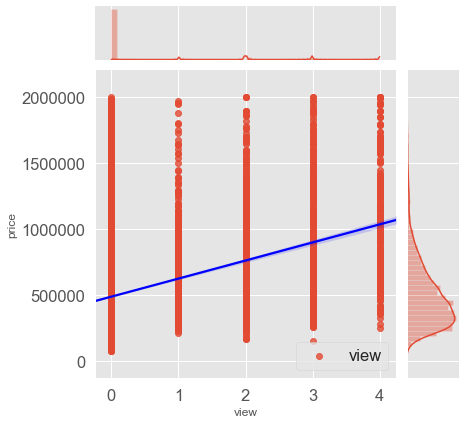

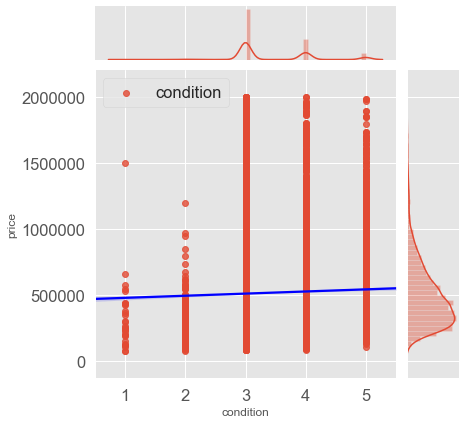

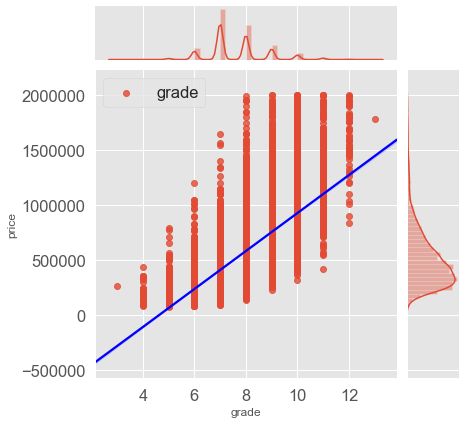

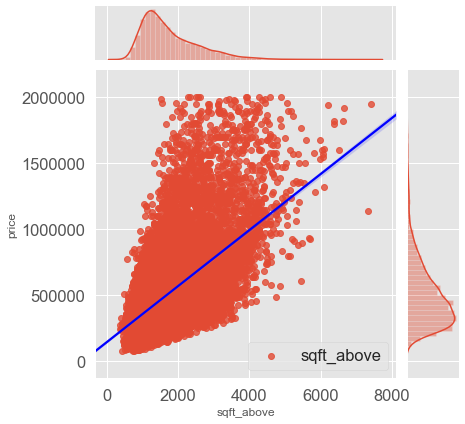

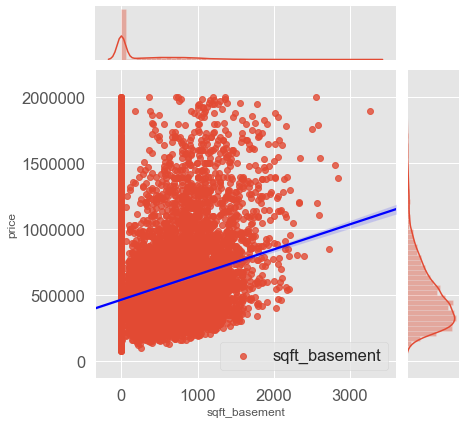

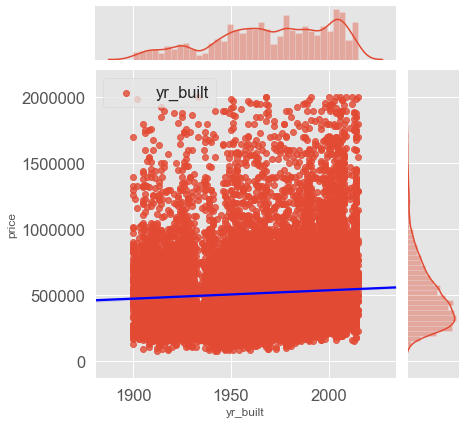

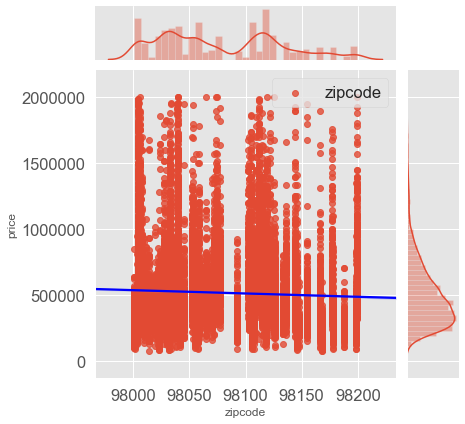

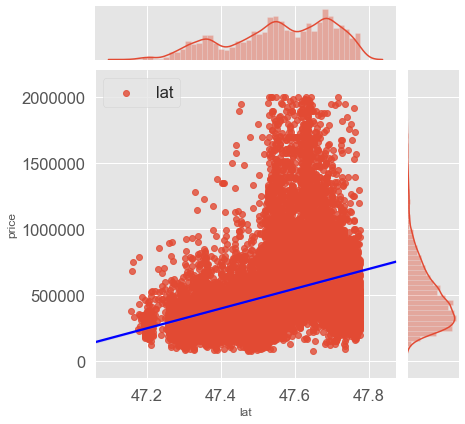

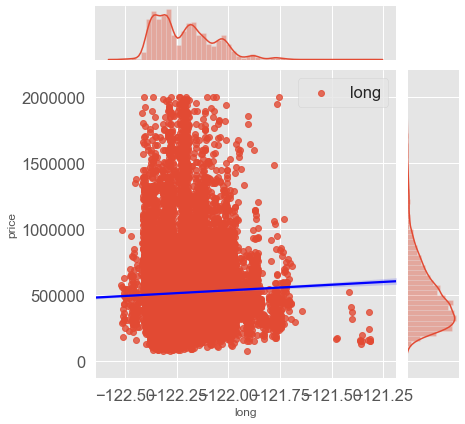

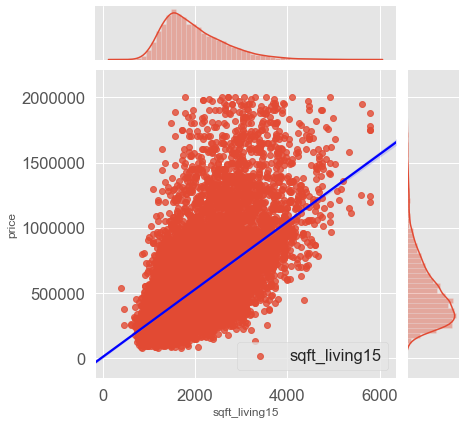

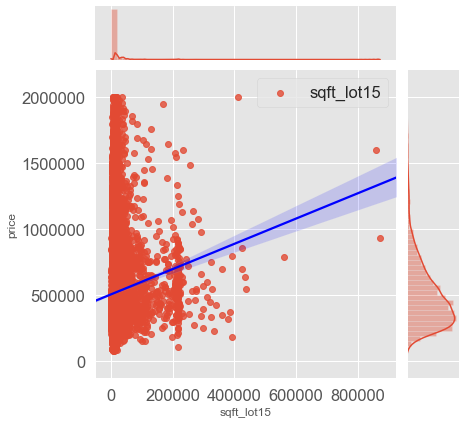

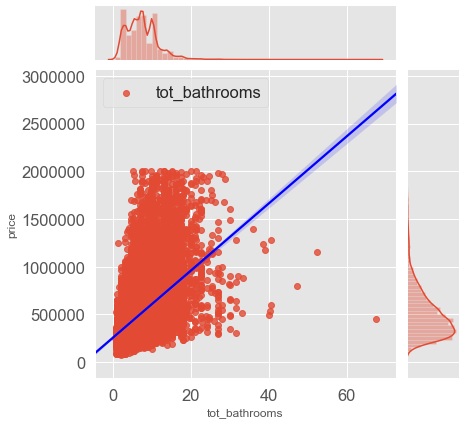

In [29]:
tmp_df=df.drop(['id', 'date'], axis=1)
headers=tmp_df.columns

#once again just iterating through our list of columns so that we get each separate plot
for column in headers:
    sns.jointplot(x=column, y="price", 
                  data=tmp_df, #
                  kind='reg', 
                  label=column, 
                  joint_kws={'line_kws':{'color':'blue'}}) #stylistic choices

    plt.legend() #including a legend for our plots
    
    plt.show()

## All data is clean and ready for analysis
Save the clean data to a kc_house_data_clean.csv file

In [30]:
df.to_csv('data/kc_house_data_clean.csv', index=False)

<p style="font-size:200%; text-align:center">Please open modelling.ipynb next for modelling</p>